## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Valentín Pertierra

***
## Estimación espectral


In [2]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

from scipy.fftpack import fft
from scipy import signal

fs = 1000 # Hz



<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

In [35]:
# Simular para los siguientes tamaños de señal
N = np.arange(10,5010,10)
realizaciones = 200

# Parametros del ruido normal
u = 0   # Media
v = 2   # Varianza

resultados = []
tus_resultados = []

for Ni in N:
    
    # Genero matriz con señales aleatoreas de ruido normal
    x = np.sqrt(v)*np.random.randn(Ni,realizaciones)+u
    
    # Obtengo el espectro
    espectro = fft(x,axis=0)*(1/Ni)
    
    # Obtengo la densidad espectral de potencia PSD
    PSD = np.abs(espectro)**2
    
    # Varianza del periodograma
    varPSD = np.var(PSD,axis=1)*(Ni**2)
    meanVarPSD = np.mean(varPSD)
    
    # Valor esperado de la PSD
    EPSD = np.mean(PSD,axis=1)
    
    # Calculo el sesgo
    sesgo = v-np.sum(EPSD)
    
    resultados.append([sesgo,meanVarPSD]) 


,$s_P$,$v_P$
10.0,-0.014317,5.018925
50.0,0.023892,3.950292
100.0,0.034522,3.881133
250.0,-0.025103,4.147856
500.0,-0.001455,4.052435
1000.0,0.004892,3.997852
5000.0,-0.005734,3.999787


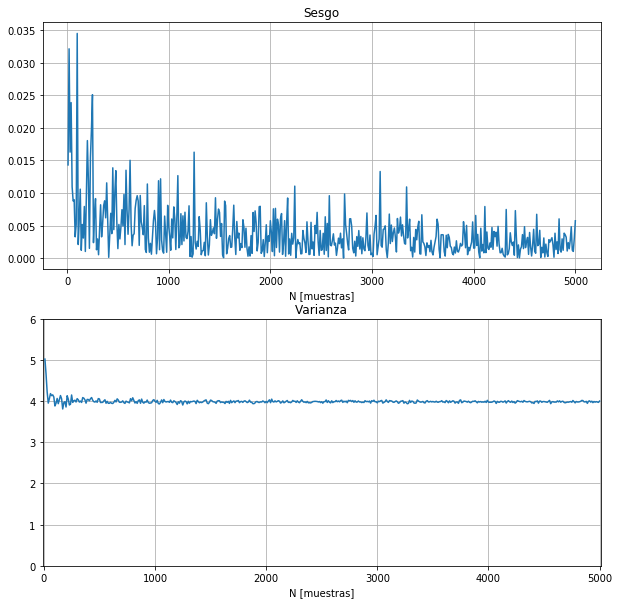

In [46]:

tus_resultados = [resultados[0],resultados[5-2],resultados[10-1],resultados[25-1],resultados[50-1],resultados[100-1],resultados[500-1]]

grafResultados = np.array(resultados)
N = np.arange(10,5010,10)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Módulo del sesgo")
plt.plot(N,np.abs(grafResultados[:,0]))          
plt.xlabel('N [muestras]')
plt.grid(True)

plt.subplot(212)
plt.title("Varianza")
plt.plot(N,grafResultados[:,1])
plt.axis([-10,N[-1]+10,0,1.5*v**2])
plt.xlabel('N [muestras]')
plt.grid(True)

N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


<div class="alert alert-block alert-success">
Se puede comprobar que el sesgo del periodograma disminuye a medida que aumenta la cantidad de muestras N, es decir, es insesgado asintóticamente $\lim_{N\to\infty} s_{p} = 0$. Pero que la varianza se mantiene constante para todos los valores de N y tiende a $\lim_{N\to\infty} v_{p} = \sigma^{4}$    

</div>

<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [47]:
# Simular para los siguientes tamaños de señal
N = np.arange(10,5010,10)
K = 4

realizaciones = 200

# Parametros del ruido normal
u = 0   # Media
v = 2   # Varianza

resultados = []
tus_resultados = []

for Ni in N:
    
    # Determino el largo de los bloques a promediar
    L = Ni//K
    
    # Genero matriz con señales aleatoreas de ruido normal
    x = np.sqrt(v)*np.random.randn(Ni,realizaciones)+u
    
    promPSD = np.zeros(shape=(L,realizaciones))
    
    # Promedio los PSD de los K bloques de la señal
    for Ki in range(K):
        espectro = fft(x[Ki*L:(Ki+1)*L,:],axis=0)*(1/L)
        PSD = np.abs(espectro)**2
        
        promPSD = promPSD+PSD/K
    
    # Varianza del estimador
    varPSD = np.var(promPSD,axis=1)*(L**2)
    meanVarPSD = np.mean(varPSD)
    
    # Valor esperado de la PSD
    EPSD = np.mean(promPSD,axis=1)
    
    # Calculo el sesgo
    sesgo = v-np.sum(EPSD)
    
    resultados.append([sesgo,meanVarPSD])


,$s_B$,$v_B$
10.0,-0.029601,1.948501
50.0,0.017771,1.154909
100.0,-0.000787,1.040431
250.0,-0.016631,1.042147
500.0,-0.002367,1.015178
1000.0,0.006968,0.974540
5000.0,0.000738,0.997389


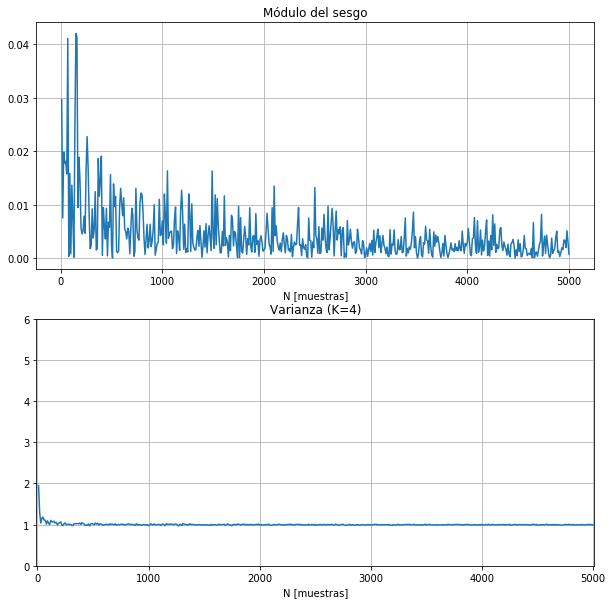

In [51]:
tus_resultados = [resultados[0],resultados[5-2],resultados[10-1],resultados[25-1],resultados[50-1],resultados[100-1],resultados[500-1]]

grafResultados = np.array(resultados)
N = np.arange(10,5010,10)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Módulo del sesgo")
plt.plot(N,np.abs(grafResultados[:,0]))          
plt.xlabel('N [muestras]')
plt.grid(True)

plt.subplot(212)
plt.title("Varianza (K="+str(K)+")")
plt.plot(N,grafResultados[:,1])
plt.axis([-10,N[-1]+10,0,1.5*v**2])
plt.xlabel('N [muestras]')
plt.grid(True)

N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

df = DataFrame(tus_resultados, columns=['$s_B$', '$v_B$'],
               index=N)
HTML(df.to_html())


<div class="alert alert-block alert-success">
Se puede comprobar que con el metodo de Bartlett el sesgo disminuye a medida que aumenta la cantidad de muestras N, es decir, es insesgado asintóticamente $\lim_{N\to\infty} s_{p} = 0$. La varianza se mantiene constante para todos los valores de N, pero disminuye inversamente proporcionalmente a la cantidad de bloques promediados K: $ \lim_{N\to\infty} v_{p} = \frac{1}{K}\sigma^{4}$.  
Por otro lado la resolución espectral disminuye a mediad que aumenta la cantidad de bloques K: $\Delta{f} = K\frac{f_{s}}{N}$
</div>

<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [5]:
""" 
Ventana de Bartlett
"""
def bartlett(L):
    
    N = L-1
    n = np.arange(0,N/2)
    
    W = 2*n/N
    
    if L%2:  #L es impar
        W = np.concatenate((W,2-2*np.arange((N+1)/2,(N+1))/(N+1)), axis=None)
    else:
        W = np.concatenate((W,W[::-1]), axis=None)

    return W

In [23]:
# Simular para los siguientes tamaños de señal
#N = [10, 50, 100, 250, 500, 1000, 5000]
N = np.arange(50,5050,50)
K = 4       # Cantidad de bloques
O = 0.5       # Solapamiento

realizaciones = 200

# Parametros del ruido normal
u = 0   # Media
v = 2   # Varianza

resultados = []
tus_resultados = []

for Ni in N:
    # Determino el largo de los bloques a promediar
    # N=L+D*(K-1)        Siendo D el desplazamiento de los bloques en muentras
    # D=(1-O)*L 
    # L=N/(1+(1-O)*(K-1))   Con este valor de L vuelvo a calcular D para que sea un número entero
    L = Ni/(1+(1-O)*(K-1))
    
    D = (1-O)*L 
    D = np.round(D)
    L = Ni-D*(K-1)
    
    D = int(D)
    L = int(L)
    
    # Genero matriz con señales aleatoreas de ruido normal
    x = np.sqrt(v)*np.random.randn(Ni,realizaciones)+u
    
    promPSD = np.zeros(shape=(L,realizaciones))
    promPSDW = np.zeros(shape=(L,realizaciones))
    xw = np.zeros(shape=(L,realizaciones))
    
    # Promedio los PSD de los K bloques de la señal
    for Ki in range(K):
        
        # Sin ventanear
        xw = x[Ki*D:Ki*D+L,:]
        
        espectro = fft(xw,axis=0)*(1/L)
        
        PSD = np.abs(espectro)**2
        #promPSD = promPSD+PSD/K
        promPSD = promPSD+PSD*2/K
        
        # Aplicando una ventana al bloque
        w = np.reshape(bartlett(L),(L,1))        
        xw = x[Ki*D:Ki*D+L,:]*w
               
        espectroW = fft(xw,axis=0)*(1/L)
        
        PSDW = np.abs(espectroW)**2
        #promPSDW = promPSDW+PSDW/K
        promPSDW = promPSDW+PSDW*2/K
    
    # Resultados sin ventaneo
    # Varianza del estimador
    varPSD = np.var(promPSD,axis=1)*(L**2)
    meanVarPSD = np.mean(varPSD)
    
    # Valor esperado de la PSD
    EPSD = np.mean(promPSD,axis=1)
    
    # Calculo el sesgo
    sesgo = v/Ni-np.mean(EPSD)
     
    # Resultados aplicando la ventana:
    # Varianza del estimador
    varPSDW = np.var(promPSDW,axis=1)*(L**2)
    meanVarPSDW = np.mean(varPSDW)
    
    # Valor esperado de la PSD
    EPSDW = np.mean(promPSDW,axis=1)
    
    # Calculo el sesgo
    sesgoW = v/Ni-np.mean(EPSDW)
    
    resultados.append([sesgo,meanVarPSD,sesgoW,meanVarPSDW])
    #print("N: "+str(Ni)+", Sesgo: "+str(sesgo)+", Varianza:"+str(meanVarPSD))



,$s_W$,$v_W$
50.0,-0.023328,0.476223
100.0,-0.011847,0.490673
250.0,-0.005193,0.481528
500.0,-0.002692,0.472119
1000.0,-0.001338,0.490431
5000.0,-0.000268,0.484732


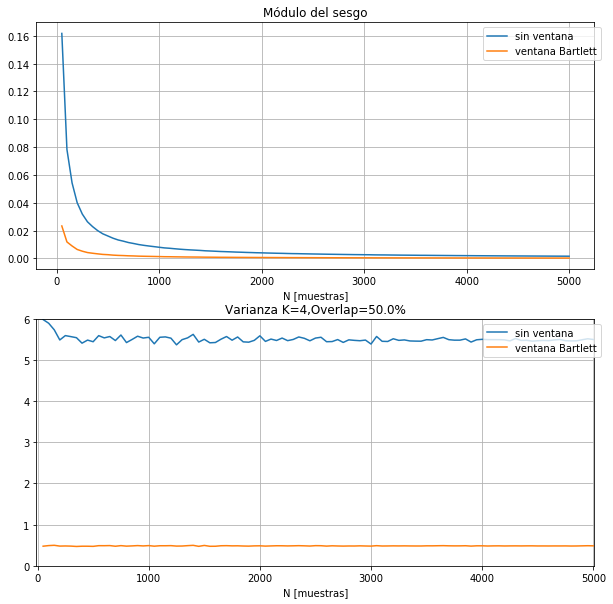

In [26]:
tus_resultados = [resultados[0][2:4],resultados[1][2:4],resultados[4][2:4],resultados[9][2:4],resultados[19][2:4],resultados[99][2:4]]

grafResultados = np.array(resultados)
N = np.arange(50,5050,50)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Módulo del sesgo")
plt.plot(N,np.abs(grafResultados[:,0]),label="sin ventana")    
plt.plot(N,np.abs(grafResultados[:,2]),label="ventana Bartlett")       
plt.xlabel('N [muestras]')
plt.legend(bbox_to_anchor=(0.80, 0.98), loc=2, borderaxespad=0.)
plt.grid(True)

plt.subplot(212)
plt.title("Varianza K="+str(K)+",Overlap="+str(O*100)+"%")
plt.plot(N,grafResultados[:,1],label="sin ventana")
plt.plot(N,grafResultados[:,3],label="ventana Bartlett")
plt.axis([-10,N[-1]+10,0,6])
plt.xlabel('N [muestras]')
plt.legend(bbox_to_anchor=(0.80, 0.98), loc=2, borderaxespad=0.)
plt.grid(True)

N = np.array([50, 100, 250, 500, 1000, 5000], dtype=np.float)

df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=N)
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

In [3]:
# Función para obtener el periodograma de Welch
def periodogramaWelch(x,K,overlap):
    
    # Determino el largo de la señal y la cantidad de realizaciones
    N = len(x[:,0])
    R = len(x[0,:])
    
    # Calculo el largo de cada bloque
    L = N/(1+(1-O)*(K-1))
    
    D = (1-O)*L 
    D = np.round(D)
    L = N-D*(K-1)
    
    D = int(D)
    L = int(L)
    
    # Inicializo vectores
    promPSDW = np.zeros(shape=(L//2,R))
    xw = np.zeros(shape=(L,R))
    
    # Promedio los PSD de los K bloques solapados
    for Ki in range(K):

        w = np.reshape(bartlett(L),(L,1))        
        xw = x[Ki*D:Ki*D+L,:]*w
               
        espW = fft(xw,axis=0)*(1/L)
        
        PSDW = np.abs(espW)**2
        PSDW = PSDW[:L//2]
        promPSDW = promPSDW+PSDW/K
        
        # Genero vector con frecuencias
        f = np.arange(L//2)*(fs/L)
    
    return f,promPSDW

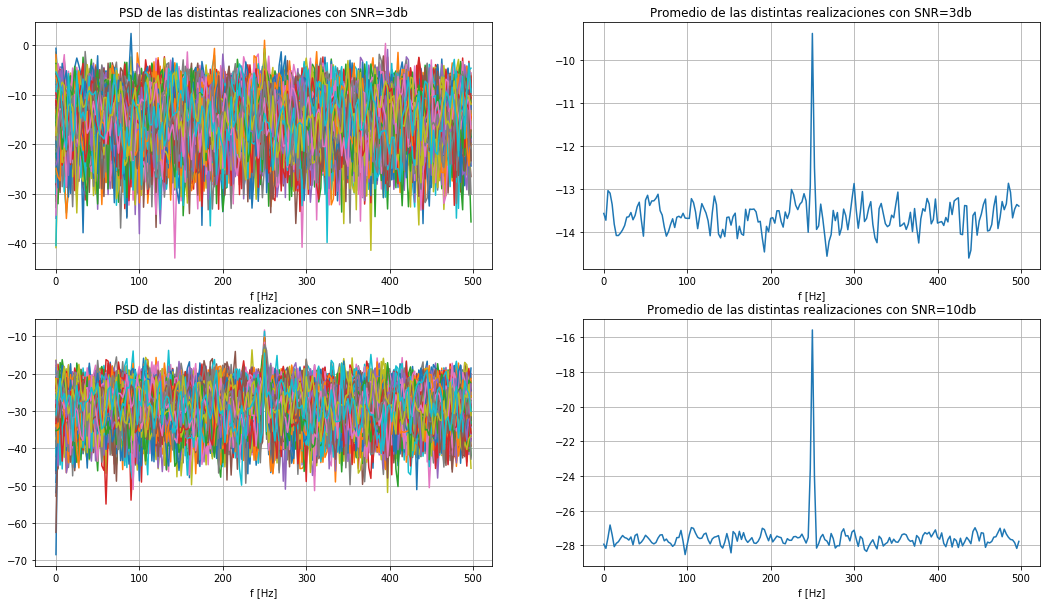

In [6]:
# Obtené los valores XX para que cumplas con el enunciado
SNR = np.array([-3,-10])

fs = 1000 # Hz
N = 1000
df = fs/N

# Parametros para el metodo de Welch
K = 4       # Cantidad de bloques
O = 0.5     # Solapamiento

# Realizaciones
R = 200

# Parametros de la señal
a1 = np.sqrt(2)   # Esta normalizada en energía
f0 = fs/4

# Variable aleatoria con distribución uniforme para fr
va = np.random.uniform(-1/2,1/2,R)

# Genero un vector con el tiempo
t = np.linspace(0,(N-1)/fs,N)

# Genero la señal senoidal
x = []
for fr in va:
    f = f0+fr*df   
    x.append(a1*np.sin(t*2*np.pi*f))

x1 = np.transpose(np.array(x))

psdMyWelch = []
resultadosMyWelch = []
for db in SNR:
    
    # Parámetros del ruido normal
    u = 0                       # Media
    v = (N/2)*10**(db/10)       # Varianza

    # Genero señal de ruido
    n = np.sqrt(v)*np.random.randn(N,R)+u

    # Le sumo el ruido a la señal senoidal
    x = x1+n

    # Obtengo el periodograma de Welch
    f,psdWelch = periodogramaWelch(x,K,O)
    
    # Estimo f0 para cada realización
    estF0 = f[np.argmax(psdWelch,axis=0)]
    
    # Obtengo el valor esperado de f0 y la varianza
    valEspF0 = np.mean(estF0)
    varEstF0 = np.var(estF0)
    
    psdMyWelch.append(psdWelch)
    resultadosMyWelch.append([valEspF0,varEstF0])

plt.figure(figsize=(18,10))
plt.subplot(221)
plt.title("PSD de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(psdMyWelch[0]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(222)
plt.title("Promedio de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(np.sum(psdMyWelch[0],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(223)
plt.title("PSD de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(psdMyWelch[1]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(224)
plt.title("Promedio de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(np.sum(psdMyWelch[1],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)


In [7]:
tus_resultados = resultadosMyWelch

# Calculo el sesgo
tus_resultados[0][0] = resultadosMyWelch[0][0]-f0
tus_resultados[1][0] = resultadosMyWelch[1][0]-f0

df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,$s_W$,$v_W$
3 dB,3.9875,21088.256094
10 dB,-1.1875,6877.746094


Utilizo el estimador con el promedio de las realizaciones

In [8]:
tus_resultados = []

estF0_3db = f[np.argmax(np.sum(psdMyWelch[0],axis = 1)/len(f))]
estF0_10db = f[np.argmax(np.sum(psdMyWelch[1],axis = 1)/len(f))]

# Calculo el sesgo
tus_resultados=[estF0_3db,estF0_10db] 


df = DataFrame(tus_resultados, columns=['$\hat{\Omega}_1^W$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,$\hat{\Omega}_1^W$
3 dB,250.0
10 dB,250.0


<div class="alert alert-block alert-success">
Para verificar que estoy implementando bien el algoritmo de Welch voy a utilizar la función scipy.signal.welch  

</div>

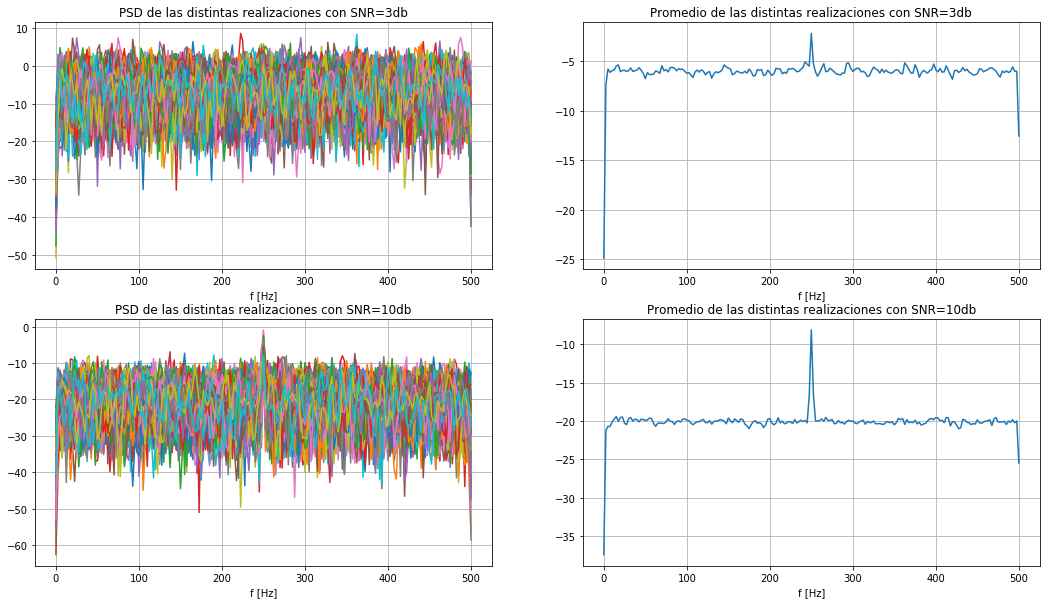

In [9]:
psdWelch = []
resultadosWelch = []

# K=4 y solapamiento de 50%
nperseg = 400
noverlap = 200

for db in SNR:
    
    # Parámetros del ruido normal
    u = 0                       # Media
    v = (N/2)*10**(db/10)       # Varianza

    # Genero señal de ruido
    n = np.sqrt(v)*np.random.randn(N,R)+u

    # Le sumo el ruido a la señal senoidal
    x = x1+n

    # Obtengo el periodograma de Welch
    psd = np.zeros(shape=((nperseg//2)+1,R)) 
    for i in range(R):
        f,psd[:,i] = signal.welch(x[:,i], fs, 'bartlett',nperseg=nperseg, noverlap=noverlap)
        #f,psd[:,i] = signal.welch(x[:,i], fs, 'hann',nperseg=nperseg, noverlap=noverlap)
    
    # Estimo f0 para cada realización
    estF0 = f[np.argmax(psd,axis=0)]
    
    # Obtengo el valor esperado de f0 y la varianza
    valEspF0 = np.mean(estF0)
    varEstF0 = np.var(estF0)
    
    psdWelch.append(psd)
    resultadosWelch.append([valEspF0,varEstF0])

plt.figure(figsize=(18,10))
plt.subplot(221)
plt.title("PSD de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(psdWelch[0]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(222)
plt.title("Promedio de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(np.sum(psdWelch[0],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(223)
plt.title("PSD de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(psdWelch[1]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(224)
plt.title("Promedio de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(np.sum(psdWelch[1],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)


In [11]:
tus_resultados = resultadosWelch

# Calculo el sesgo
tus_resultados[0][0] = resultadosWelch[0][0]-f0
tus_resultados[1][0] = resultadosWelch[1][0]-f0

df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,$s_W$,$v_W$
3 dB,-15.0625,22915.464844
10 dB,-3.5125,6128.068594


<div class="alert alert-block alert-warning">
Voy a utilizar el metodo de Blackman Tukey para la segunda estimacion espectral 
</div>

/home/valentin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10
/home/valentin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10


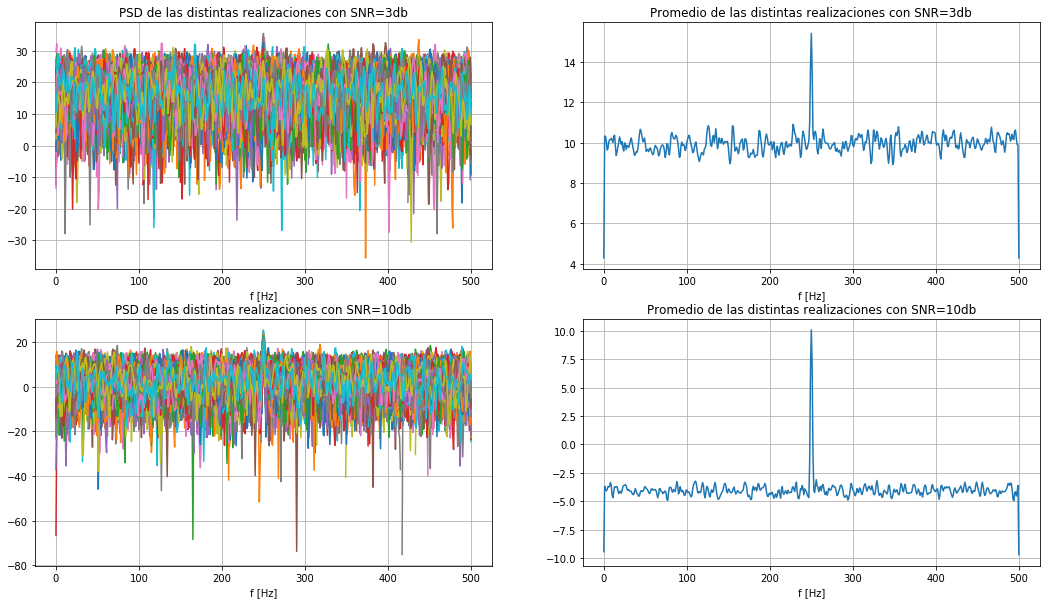

In [12]:
import spectrum as sp


psdBT = []
resultadosBT = []


for db in SNR:
    
    # Parámetros del ruido normal
    u = 0                       # Media
    v = (N/2)*10**(db/10)       # Varianza

    # Genero señal de ruido
    n = np.sqrt(v)*np.random.randn(N,R)+u

    # Le sumo el ruido a la señal senoidal
    x = x1+n

    # Obtengo el psd de Blackman Tukey
    psd = np.zeros(shape=((N//2)+1,R))
    for i in range(R):
        p = sp.pcorrelogram(x[:,i],lag=400,NFFT=N,scale_by_freq=True,window = 'hamming')
        #p = sp.pcorrelogram(x[:,i],lag=400,NFFT=N,scale_by_freq=True,window = 'bartlett')
        psd[:,i] = p.psd/(N*400)
        
    
    # Genero vector de frecuencias
    f = np.arange(len(psd))*(fs/N)

    # Estimo f0 para cada realización
    estF0 = f[np.argmax(psd,axis=0)]
    
    # Obtengo el valor esperado de f0 y la varianza
    valEspF0 = np.mean(estF0)
    varEstF0 = np.var(estF0)
    
    psdBT.append(psd)
    resultadosBT.append([valEspF0,varEstF0])

plt.figure(figsize=(18,10))
plt.subplot(221)
plt.title("PSD de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(psdBT[0]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(222)
plt.title("Promedio de las distintas realizaciones con SNR=3db")
plt.plot(f,20*np.log10(np.sum(psdBT[0],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(223)
plt.title("PSD de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(psdBT[1]))          
plt.xlabel('f [Hz]')
plt.grid(True)

plt.subplot(224)
plt.title("Promedio de las distintas realizaciones con SNR=10db")
plt.plot(f,20*np.log10(np.sum(psdBT[1],axis = 1)/len(f)))          
plt.xlabel('f [Hz]')
plt.grid(True)


In [13]:
tus_resultados = resultadosBT

# Calculo el sesgo
tus_resultados[0][0] = resultadosBT[0][0]-f0
tus_resultados[1][0] = resultadosBT[1][0]-f0

df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,$s_W$,$v_W$
3 dB,11.87,18425.1031
10 dB,4.32,4648.0876


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())


,$i_W$,$i_X$
3 dB,,
10 dB,,
